In [1]:
ns = []
ks = []
methods =[]
times = []

with open("exp.txt", "r") as file:
    for line in file:
        line = line.strip()
        if line:
            parts = line.split(", ")
            n = int(parts[0].split(" = ")[1])
            k = int(parts[1].split(" = ")[1])
            method = int(parts[2].split(" = ")[1])
            time = float(parts[3].split(": ")[1].split(" ms")[0])
            ns.append(n)
            ks.append(k)
            methods.append(method)
            times.append(time)

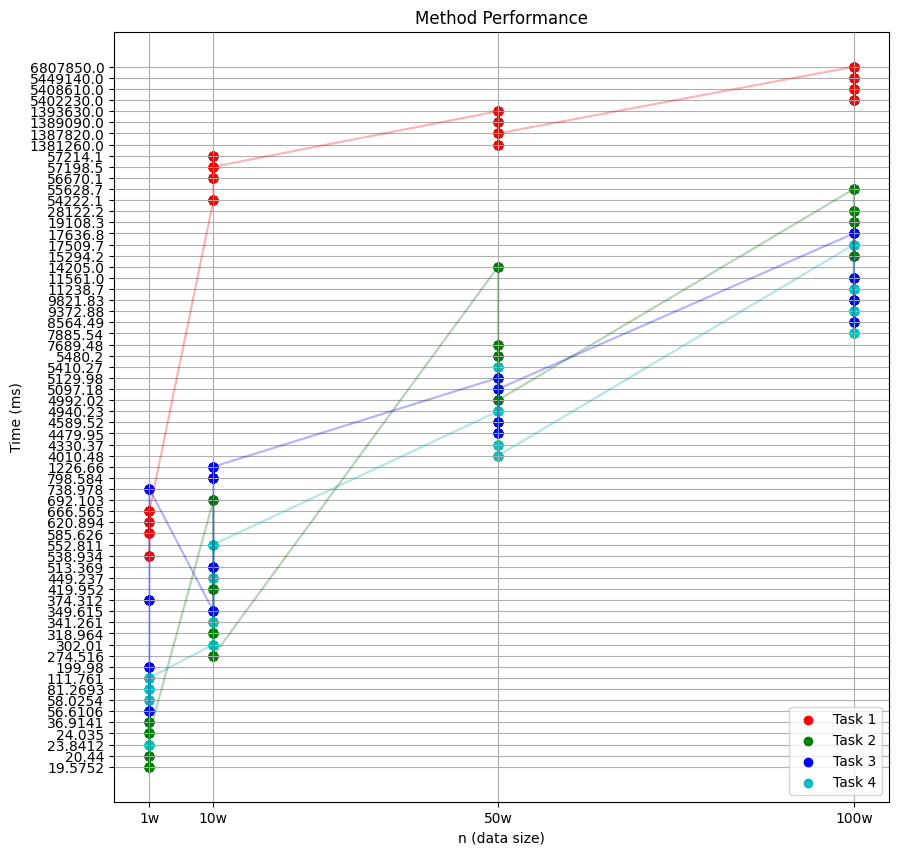

In [4]:
import copy
import matplotlib.pyplot as plt

# 深拷贝时间数据并对其进行排序
y_ticks = copy.deepcopy(times)
y_ticks.sort()

# 创建y轴刻度
y_axis = [i for i in range(len(y_ticks))]

# 创建x轴刻度
x_ticks = ['1w', '10w', '50w', '100w']
x_axis = [10000, 100000, 500000, 1000000]

# 创建颜色列表
colors = ['r', 'g', 'b', 'c']

# 创建图表
plt.figure(figsize=(10, 10))

# 创建一个字典来跟踪已添加到图例的方法
legend_entries = {}

# 分别绘制每个任务的散点和曲线
for i in range(len(times)):
    # 根据任务的不同，选择相应的颜色和方法
    method = methods[i]
    color = colors[method - 1]
    
    # 找到相应方法的所有点
    x_values = [x_axis[x_axis.index(ns[j])] for j in range(len(times)) if methods[j] == method]
    y_values = [y_axis[y_ticks.index(times[j])] for j in range(len(times)) if methods[j] == method]
    
    # 只在第一次遇到方法时添加到图例中
    if method not in legend_entries:
        plt.scatter(x_values, y_values, label=f'Task {method}', color=color)
        legend_entries[method] = True
    else:
        plt.scatter(x_values, y_values, color=color)
    
    # 對每個方法的散點座標進行排序，然後繪製連接曲線
    sorted_indices = sorted(range(len(x_values)), key=lambda k: x_values[k])
    sorted_x = [x_values[i] for i in sorted_indices]
    sorted_y = [y_values[i] for i in sorted_indices]
    plt.plot(sorted_x, sorted_y, color=color, alpha=0.02)

plt.xlabel('n (data size)')
plt.ylabel('Time (ms)')
plt.title('Method Performance')

plt.xticks(x_axis, x_ticks)
plt.yticks(y_axis, y_ticks)

plt.grid(True)

plt.legend(loc='lower right')
plt.savefig('./fig.png')
plt.show()
plt.close()
